### Import Libraries

In [132]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [133]:
anime_data=pd.read_csv('D:/code/anime.csv')
rating_data=pd.read_csv('D:/code/rating.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the anime data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())
print('\n\n')
print ("The shape of the rating data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the anime data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None



The shape of the rating data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


## Merging dataframes

In [134]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head(3)

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10


NULL Values

In [135]:
anime_fulldata.isnull().sum()

anime_id         0
anime_title      0
genre          110
type             4
episodes         0
rating           6
members          0
user_id          0
user_rating      0
dtype: int64

<a id="section-three"></a>
# Analyze the data

Text(0, 0.5, 'User Rating count')

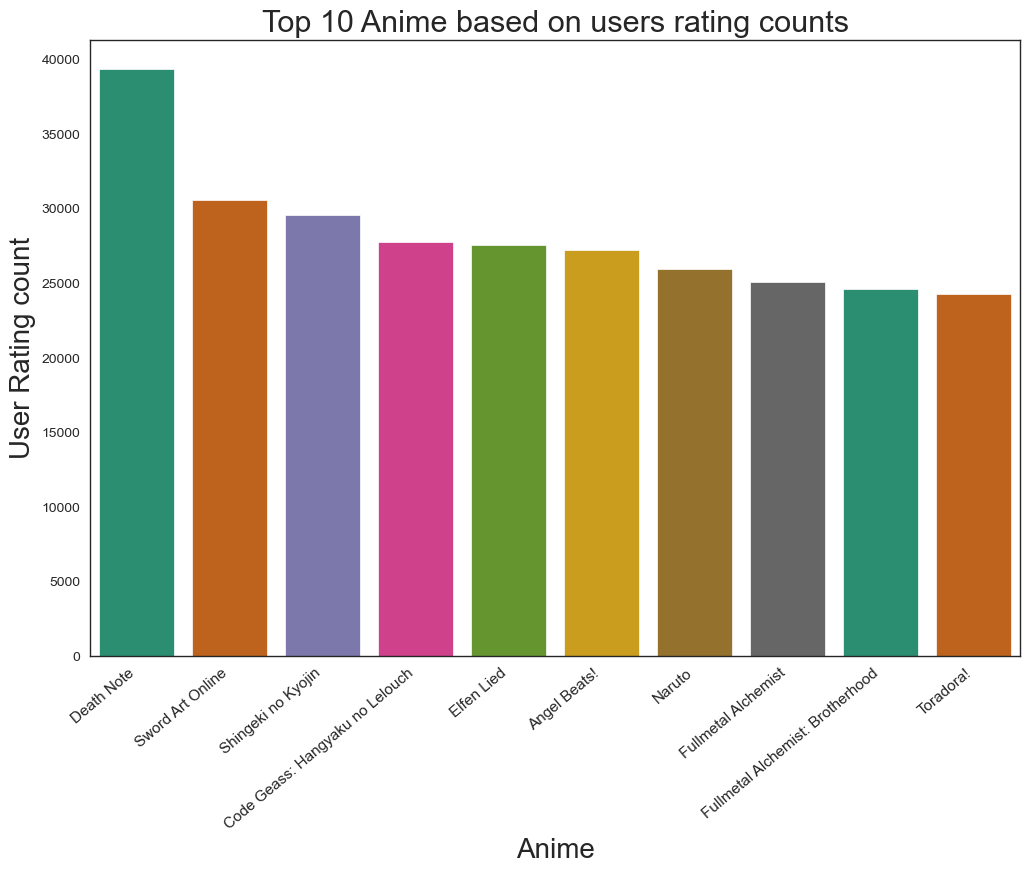

In [136]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on users rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

**Results:** <br>
* Death Note wears the crown for rating count followed by sword art online and Attack on Titan

In [137]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})
anime_fulldata

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,2199
...,...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1,4
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1,4
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1,2


In [138]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)

Text(0, 0.5, 'Community Size')

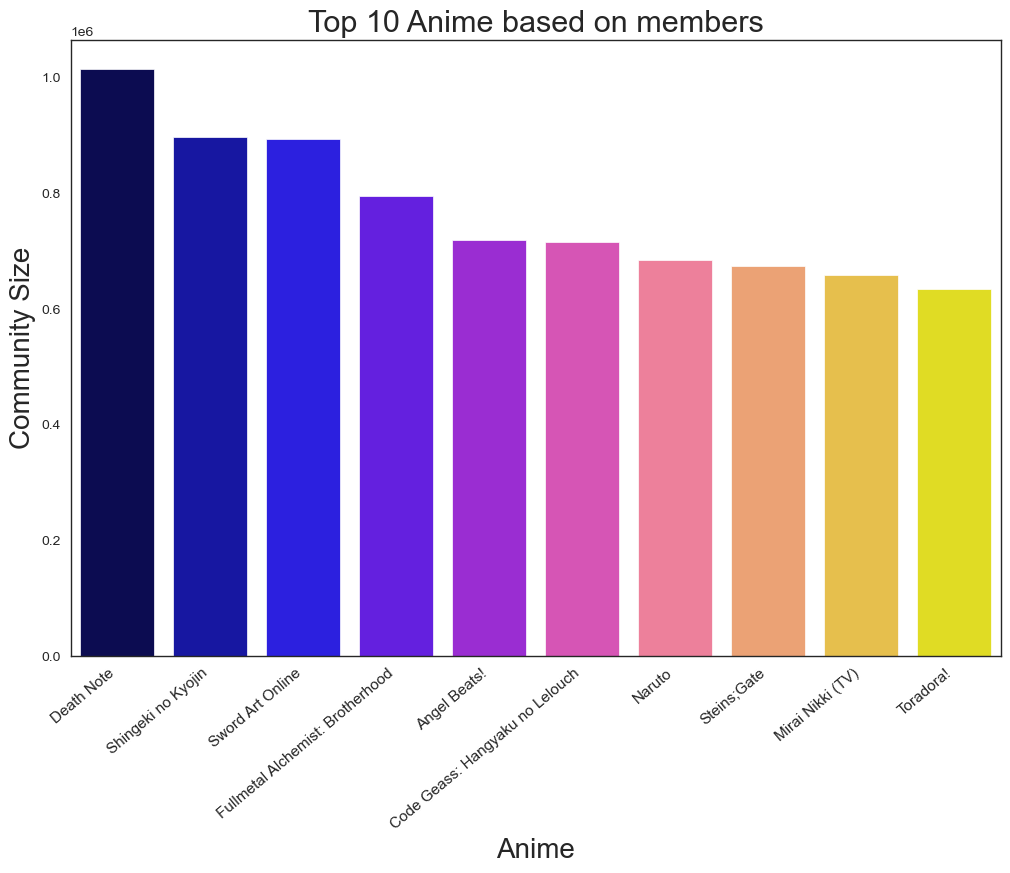

In [139]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

**Results:**
* Death note captures the crown again .

In [140]:
print('\033[1m' + 10*"*" + ' MEAN WEBSITE RATING ' + 10*"*" + '\033[0m')
anime_fulldata['rating'].mean()

********** MEAN WEBSITE RATING **********


7.653127073541235

In [141]:
print('\033[1m' + 10*"*" + ' MEAN USER RATING ' + 10*"*" + '\033[0m')
anime_fulldata['user_rating'].mean()

********** MEAN USER RATING **********


6.144036130261526

Text(0.5, 1.0, 'Rating of users')

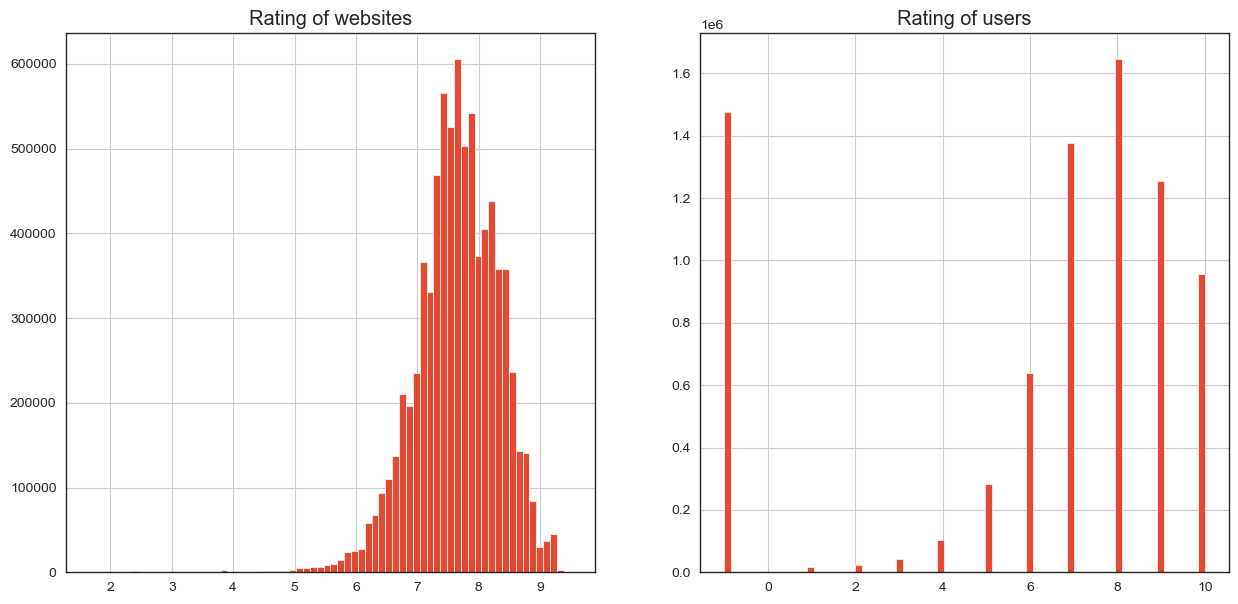

In [142]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

**Insights:**
* Most of the ratings are spread between 6-10
* The mode of the distribution is around 7.5-8.0
* Both the distribution are left skewed
* We have -1 rating as an outlier in rating of users which can be made into NaN

## Medium of streaming 
 

In [143]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

**Insights:**
* 67.6% of the anime's were aired on TV followed by 13.5% through Movie
* 10.2% of anime's are streamed as OVA which is greater than ONA(1.18%)

## Genre Word Cloud

(-0.5, 799.5, 399.5, -0.5)

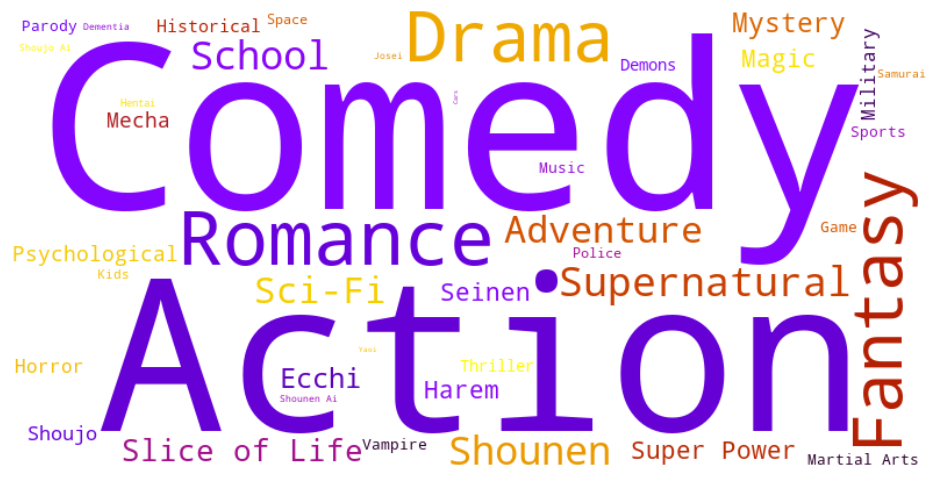

In [144]:
#Sharingan copy: https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

We can sense there are many Comedy genre anime's followd by action, romance,drama in our dataset



<a id="section-four"></a>
# Preparing data for consumption

### a) Handling NaN values

In [145]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN,2199


In [146]:
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_id            0
anime_title         0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

### b) Filtering user_id

In [147]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

#### There are users who has rated only once, even if they have rated it 5, it can't be considered a valuable record for recommendation. So I have considered minimum 200 ratings by the user as threshold value. You can play around changing the threshold value to get better results, but this worked fine.

In [148]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

### c) Pivot Dojo

#### This pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity ! Don't know what is cosine similarity ? don't worry, We will reveal that in the next section.

In [149]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,210,226,233,235,244,248,250,256,261,271,282,288,294,301,308,317,321,326,341,352,385,392,395,418,428,436,438,439,446,455,460,462,478,492,497,500,511,529,530,531,540,541,547,551,553,565,567,572,573,578,585,593,598,611,634,637,656,659,660,661,662,670,680,687,692,694,702,721,735,741,746,750,762,768,771,774,783,784,786,795,799,806,813,814,819,820,847,861,890,894,916,920,926,936,937,943,946,954,958,963,979,995,996,1013,1019,1020,1031,1044,1058,1084,1103,1114,1116,1119,1132,1140,1145,1163,1169,1176,1190,1191,1195,1202,1210,1213,1216,1222,1223,1235,1237,1244,1274,1280,1284,1287,1306,1309,1324,1327,1332,1344,1349,1354,1366,1378,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1497,1501,1504,1522,1530,1541,1549,1551,1558,1570,1576,1578,1585,1589,1600,1605,1619,1620,1623,1647,1651,1689,1695,1697,1701,1705,1711,1720,1734,1737,1753,1771,1786,1788,1797,1798,1807,1811,1822,1835,1842,1843,1844,1847,1853,1854,1888,1890,1913,1918,1929,1937,1938,1947,1954,1957,1963,1984,1987,2016,2021,2025,2050,2102,2113,2115,2118,2125,2141,2165,2194,2200,2204,2212,2246,2268,2273,2290,2297,2298,2300,...,70832,70838,70839,70842,70844,70879,70881,70884,70888,70931,70938,70953,70961,70998,71008,71016,71021,71029,71078,71115,71118,71122,71178,71184,71198,71212,71224,71225,71226,71231,71250,71252,71253,71278,71284,71300,71302,71330,71339,71362,71363,71377,71429,71435,71438,71453,71456,71466,71491,71498,71508,71529,71537,71564,71573,71607,71610,71619,71632,71655,71673,71699,71731,71739,71749,71754,71766,71770,71780,71790,71792,71794,71796,71804,71808,71812,71816,71817,71821,71822,71844,71850,71854,71862,71877,71882,71893,71896,71898,71901,71908,71932,71942,71943,71945,71947,71951,71968,71971,71973,71974,71977,71984,71999,72007,72021,72035,72042,72043,72049,72052,72059,72060,72095,72107,72115,72126,72130,72196,72254,72263,72264,72268,72294,72305,72306,72317,72329,72400,72404,72409,72468,72511,72512,72516,72520,72526,72528,72541,72549,72554,72610,72627,72630,72646,72661,72663,72677,72685,72694,72715,72759,72760,72767,72776,72786,72787,72789,72800,72811,72814,72817,72846,72857,72872,72875,72884,72889,72928,72941,72945,72946,72947,72954,72959,72960,72968,72997,73005,73012,73031,73058,73070,73073,73075,73086,73088,73099,73101,73111,73114,73123,73132,73135,73152,73153,73155,73159,73160,73162,73177,73179,73188,73193,73197,73203,73212,73216,73221,73234,73248,73251,73257,73260,73262,73264,73272,73276,73278,73282,73284,73286,73288,73301,73317,73320,73328,73329,73340,73341,73343,73346,73356,73359,73362,73378,73379,73380,73389,73395,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

<a id="section-five"></a>
# Recommendation building phase

## Collaborative Filtering

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Collaborative_filtering.gif/300px-Collaborative_filtering.gif">

#### Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

### Cosine Similarity using KNN


<img src="https://dataconomy.com/wp-content/uploads/2015/04/Five-most-popular-similarity-measures-implementation-in-python-4-620x475.png">


#### Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [150]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#### We have fitted the sparse matrix, let's get a random anime title and find recommendation for it. 

In [151]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


1301


#### Here we are returning the distances and indices of 6 neighbours through KNN from the randomly chosen index(anime_title) those will be our recommended anime's

In [152]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Choujin Locke: Mirror Ring:

1: Choujin Locke: Shinsekai Sentai, with distance of 0.6074442516910982:
2: Arrow Emblem Grand Prix no Taka, with distance of 0.6818510467481029:
3: Ashita e Attack!, with distance of 0.6822599989507832:
4: Arabian Nights: Sindbad no Bouken, with distance of 0.7378172948735359:
5: Grandeek, with distance of 0.7521298752132399:


## Content based filtering

<img src="https://miro.medium.com/max/4056/1*yrkvweErbifbPFkBUyZlOw.png">


#### Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document.A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

### a) Cleaning anime_title

#### We got many symbols found in anime_title. Let's remove those using this function

In [153]:
#Sharingan copy:https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

#### We have got the title cleaned and neat. Now it's time for the ultimate TFIDF to recommend us the next anime

### b) Term Frequency (TF) and Inverse Document Frequency (IDF)

<img src="https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png">


#### TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

#### Here we are gonna use it on the genre so that we can recommend the users based on genre content.

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [155]:
tfv_matrix.shape

(12294, 1554)

#### Scikit-learn already provides pairwise metrics (a.k.a. kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. Here we need to assign 1 for recommended anime and 0 for not recommended anime. So we are using sigmoid kernel

In [156]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [157]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

#### We have got the indices for the anime_title, now let's jump onto figure out the recommended anime

### c) Recommendation function

#### Here we create the function for getting the recommendation for an anime. We turn the similarity scores into lists using enumerate function, sort the list and select the top 10 score for recommendation. 

In [158]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})

In [159]:
give_rec('Naruto: Shippuuden')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [160]:
give_rec('Steins;Gate')

,Anime name,Rating
0,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61
1,Steins;Gate: Oukoubakko no Poriomania,8.46
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34
3,Steins;Gate 0,NaN
4,Under the Dog,6.55
5,Loups=Garous,6.43
6,Loups=Garous Pilot,5.87
7,Ibara no Ou,7.24
8,Arve Rezzle: Kikaijikake no Yousei-tachi,6.44
9,Higashi no Eden,8.03


In [161]:
give_rec('Shingeki no Kyojin')

,Anime name,Rating
0,Shingeki no Kyojin OVA,7.88
1,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,7.75
2,Shingeki no Kyojin Movie 1: Guren no Yumiya,7.70
3,Shingeki no Kyojin: Ano Hi Kara,6.96
4,Shingeki no Kyojin Season 2,NaN
5,One Piece,8.58
6,One Piece: Episode of Merry - Mou Hitori no Na...,8.29
7,One Piece: Episode of Nami - Koukaishi no Nami...,8.27
8,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.78
9,Dragon Ball Specials,6.96


In [162]:
give_rec('One Piece')

,Anime name,Rating
0,One Piece: Episode of Merry - Mou Hitori no Na...,8.29
1,One Piece: Episode of Nami - Koukaishi no Nami...,8.27
2,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.78
3,One Piece Film: Strong World,8.42
4,One Piece Film: Z,8.39
5,One Piece Film: Gold,8.32
6,One Piece: Heart of Gold,7.75
7,Digimon Frontier,7.25
8,Digimon Tamers,7.65
9,Digimon Savers,7.10


In [163]:
give_rec('Dragon Ball Z')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62


In [219]:
from sklearn.model_selection import train_test_split
anime_fulldata_a = anime_fulldata.loc[0:100]
train_df, test_df = train_test_split(anime_fulldata_a, 
                                   test_size=0.2,
                                   random_state=42)
print('Train set: %d' % len(train_df))
print('Test set: %d' % len(test_df))

Train set: 80
Test set: 21


In [220]:
# r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

# ratings_base = pd.read_csv('ml-100k/ub.base', sep='\t', names=r_cols, encoding='latin-1')
# ratings_test = pd.read_csv('ml-100k/ub.test', sep='\t', names=r_cols, encoding='latin-1')

ratings_base = train_df[['user_id','anime_id','user_rating']]
ratings_test = test_df[['user_id','anime_id','user_rating']]

rate_train = ratings_base.to_numpy()
rate_test = ratings_test.to_numpy()

# indices start from 0
rate_train[:, :2] -= 1
rate_test[:, :2] -= 1

In [221]:
import pandas as pd 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse 

class CF:

    def __init__(self, data, k=1, sim_func=cosine_similarity, uuCF=True):
        '''
        Class CF nhận dữ liệu đầu vào gồm:
            * Ma trận dữ liệu xếp hạng từ người dùng **data** gồm ba cột user_id, movie_id, rating
            * k là số điểm lân cận có độ tương đồng lớn nhất
            * sim_func là hàm tính toán độ similarity
            * uuCF=True thể hiện CF đang sử dụng uuCF, ngược lại đang sử dụng iiCF
        '''
        self.data = data if uuCF else data.iloc[:, [1, 0, 2]]
        self.k = k
        self.sim_func = sim_func
        self.uuCF = uuCF

        self.users = self.data.iloc[:, 0].unique()
        self.items = self.data.iloc[:, 1].unique()
    #   Hàm tính toán ma trận chuẩn hoá
    def normalize(self):
        '''
        Việc chuẩn hoá được thực hiện bằng cách:
            * vector chuẩn hoá = vector - trung bình cộng của vector đó
        '''
        users = self.data.iloc[:, 0]
        cdata = self.data.copy()
        self.means = np.zeros((len(self.users), ))
        for idx, user in enumerate(self.users):
            ids = np.where(users == user)[0]
            ratings = self.data.iloc[ids, 2]
            mean = np.mean(ratings)
            if np.isnan(mean):
                mean = 0
            self.means[idx] = mean
            cdata.iloc[ids, 2] = ratings - mean
        # Lưu theo dạng ma trận sparse, tức chỉ lưu vị trí có đánh giá khác 0
        self.data_csr = sparse.coo_matrix((cdata.iloc[:, 2],
                                   (cdata.iloc[:, 1], cdata.iloc[:, 0]))).tocsr()
    #   Hàm xây dựng ma trận tương đồng
    def similarity(self):
        self.sim_matrix = self.sim_func(self.data_csr.T, self.data_csr.T)
    #   Hàm fit để gọi và thực thi việc tính toán ma trận chuẩn hoá và ma trận tương đồng
    def fit(self):
        self.normalize()
        self.similarity()
    #   Hàm __pred dự đoán mức độ quan tâm của user u lên item i
    def __pred(self, u, i, normalized=True):
        ids = np.where(self.data.iloc[:, 1] == i)[0]
        users_rated_i = self.data.iloc[ids, 0].to_numpy()
        sim = self.sim_matrix[u, users_rated_i]

        k_most = np.argsort(sim)[-self.k:]

        nearest_s = sim[k_most]
        rating = self.data_csr[i, users_rated_i[k_most]]
        if normalized:
            return (rating*nearest_s)[0]/(np.sum(np.abs(nearest_s)) + 1e-8)
        return (rating*nearest_s)[0]/(np.abs(nearest_s).sum() + 1e-8) + self.means[u]
    

    def pred(self, u, i, normalized=True):
        '''
        Trường hợp uuCF, ta truyền vào hàm __pred hai ma trận u, i bình thường.
        Tuy nhiên iiCF ta hiểu ngược lại là item đang "đánh giá" user 
        nên cần hoán đổi vị trí cho nhau
        '''
        if self.uuCF:
            return self.__pred(u, i, normalized)
        return self.__pred(i, u, normalized)
    
    def recommend(self, u):
        ids = np.where(self.data.iloc[:, 0] == u)[0]
        items_rated_by_u = self.data.iloc[ids, 1].tolist()
        recommended_items = {}
        for i in range(self.items.size):
            if i not in items_rated_by_u:
                rating = self.__pred(u, i)
                if rating > 0:
                    recommended_items[i] = rating
        # Get top 10
        recommended_items = {k: v for k, v in sorted(recommended_items.items(), key=lambda item: item[1])}
        return list(recommended_items.keys())[:10]

    def print_recommendation(self, n_user):
        print("Recommendation")
        for u in range(n_user):
            recommended_items = self.recommend(u)
            if self.uuCF:
                print(f"Recommend item(s): {recommended_items} to user {u}")
            else:
                print(f"Recommend item: {u} to user(s) {recommended_items}")

In [222]:
def RMSE(model: CF, test_set):
    SE = 0
    n_tests = len(test_set)
    for i in range(n_tests):
        pred = model.pred(test_set[i, 0], test_set[i, 1], normalized=True)
        SE += (pred - test_set[i, 2])**2
    return np.sqrt(SE/n_tests)

In [223]:
#RMSE on test set
rs = CF(ratings_base, k=30, uuCF=1)
rs.fit()
print(f"User-user CF, RMSE = {RMSE(rs,rate_test)}")

User-user CF, RMSE = 8.783100656536798


In [224]:
#RMSE on train set
rs = CF(ratings_base, k=30, uuCF=1)
rs.fit()
print(f"User-user CF, RMSE = {RMSE(rs,rate_train)}")

User-user CF, RMSE = 8.910667763978186
